In [1]:
# Import some libraries
import time
import os
#For counting elements
from collections import Counter
# For plotting data
import matplotlib.pyplot as plt 
import numpy as np              
# For Panda dataframes. A dataframe is a matrix-like structure, similar to R dataframes  
import pandas as pd
#For spliting train_test (does aleatorization yet))
from sklearn.model_selection import train_test_split
#For shuffling if not using train_test_split 
from sklearn.utils import shuffle 
#For Bernoulli Naive Bayes  Classifier
from sklearn.naive_bayes import BernoulliNB
#For Random Forest  Classifier
from sklearn.ensemble import RandomForestClassifier
#For Gradient boosting Classifier
import xgboost as xgb
#For grid Serach with cross-validation model selection
from sklearn.model_selection import GridSearchCV
#encoding labels
from sklearn import preprocessing

In [2]:
#Reading data set [only supervised instances:clients that have bougth another vehicle]
data=pd.read_csv('RECENG_TRAIN_201408.csv')

In [3]:
#Storing features in an array
cols = data.columns.values
features = cols[2:]

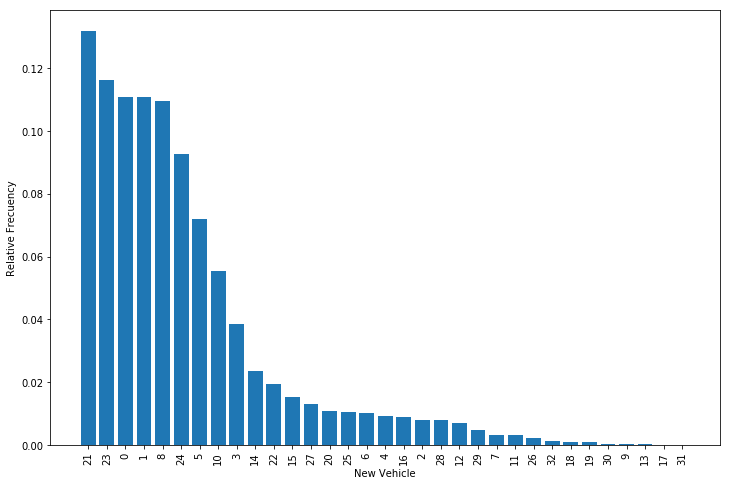

In [4]:
#Encrypting vehicles
le=preprocessing.LabelEncoder()
le.fit(list(data[cols[1]]))
veh_model=le.transform(list(data[cols[1]]))

#Counter class ocurrences
classes_ocurrences=sorted(list(Counter(veh_model).items()),key=lambda x:-x[1]);classes_ocurrences


height = [x[1]/len(data) for x in classes_ocurrences]
bars = [x[0] for x in classes_ocurrences]
y_pos = np.arange(len(bars))
fig=plt.figure(figsize=(12,8))
# Create bars
plt.bar(y_pos, height)
 
# Create names on the x-axis
plt.xticks(y_pos, bars,rotation=90)
 
# Show graphic
plt.xlabel("New Vehicle")
plt.ylabel("Relative Frecuency")
plt.show()

In [5]:
#Filter Classes with too few ocurrences (for example 10, to avoid cv with no representation)
classes_enough_ocurrences={ k:v for (k,v) in classes_ocurrences if v>=10}
print(classes_enough_ocurrences)
data=data[data[cols[1]].isin(le.inverse_transform(list(classes_enough_ocurrences.keys())))]

{21: 2782, 23: 2451, 0: 2341, 1: 2340, 8: 2309, 24: 1956, 5: 1517, 10: 1168, 3: 811, 14: 499, 22: 408, 15: 320, 27: 278, 20: 228, 25: 225, 6: 215, 4: 198, 16: 191, 2: 171, 28: 171, 12: 148, 29: 101, 7: 67, 11: 65, 26: 46, 32: 27, 18: 21, 19: 18}


/home/umcs2/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [6]:
#remainning classes
len(set(data[cols[1]]))

28

In [7]:
#Shuffling data (useful in case we won't use train_test_split and for asuring randomness)
data = shuffle(data)

In [8]:
#Splitting data set in train and test input(X) and target(y)
X = pd.get_dummies(data[features])
y = data["target_Model_Desc"]

X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size=0.2)

In [9]:
#Training Bernoulli Naive Bayes Classifier with GridSearch of hyperparameters and cross-validation
start = time.time()
hyperparametersNB = { 'alpha':[0.1,0.5,0.2,0.8,1,5, 10]}
clfNB = BernoulliNB( )
gridNB = GridSearchCV(clfNB, hyperparametersNB,n_jobs=4, cv=4,scoring='accuracy',return_train_score=True)
gridNB.fit(X_train, y_train)
end = time.time()
t=end-start
print('Trainning time ',t,' s')

Trainning time  3.5871124267578125  s


In [10]:
pd.DataFrame(gridNB.cv_results_)[sorted( set(sorted(gridNB.cv_results_.keys())[2:5])| set(sorted(gridNB.cv_results_.keys())[17:]))].sort_values(by='mean_test_score', ascending=False)

,mean_test_score,mean_train_score,param_alpha,std_test_score,std_train_score
6,0.223646,0.234759,10,0.009644,0.002062
5,0.218959,0.230685,5,0.008130,0.002208
4,0.201578,0.214965,1,0.002627,0.002894
3,0.200510,0.213976,0.8,0.002323,0.003600
1,0.197603,0.211979,0.5,0.003127,0.003943
2,0.196417,0.210614,0.2,0.003726,0.004027
0,0.195705,0.210318,0.1,0.003869,0.003919


In [11]:
#Necessary accuracy
#Predict the most frequent class always
classes_ocurrences[0][1]/len(X)

0.13202353834472286

In [12]:
#Training Random Forest Classifier with GridSearch of hyperparameters and cross-validation
start = time.time()
hyperparametersRF = { 'n_estimators':[100,200,300],'max_depth':[5,10,20]}
clfRF = RandomForestClassifier()
gridRF = GridSearchCV(clfRF, hyperparametersRF, n_jobs=4, cv=4,scoring='accuracy',return_train_score=True)
gridRF.fit(X_train, y_train)
end = time.time()
t=end-start
print('Trainning time ',t,' s')

Trainning time  91.03984928131104  s


In [13]:
pd.DataFrame(gridRF.cv_results_)[sorted( set(sorted(gridRF.cv_results_.keys())[2:6])| set(sorted(gridRF.cv_results_.keys())[18:]))].sort_values(by='mean_test_score', ascending=False)

,mean_test_score,mean_train_score,param_max_depth,param_n_estimators,std_test_score,std_train_score
5,0.263867,0.438374,10,300,0.002171,0.001821
4,0.262858,0.434459,10,200,0.003307,0.001143
3,0.262443,0.438988,10,100,0.001931,0.001466
8,0.242036,0.986059,20,300,0.003781,0.000781
7,0.241146,0.986118,20,200,0.001003,0.001283
0,0.238714,0.253504,5,100,0.002217,0.002403
6,0.238239,0.985011,20,100,0.005385,0.000784
1,0.237765,0.255166,5,200,0.004092,0.002264
2,0.237765,0.254909,5,300,0.004493,0.001342


In [ ]:
#Training Gradient boosting Classifier with GridSearch of hyperparameters and cross-validation
start = time.time()
hyperparametersGB = {'n_estimators': [5,10,20],'max_depth': [ 3,6,12]}
clfGB = xgb.XGBClassifier(nthread=1,booster = 'gbtree',objective='binary:logistic')
gridGB = GridSearchCV(estimator=clfGB, param_grid=hyperparametersGB, n_jobs=4, cv=4, scoring="accuracy", verbose=0,
                    refit=True,return_train_score=True)
gridGB.fit(X_train, y_train)
end = time.time()
t=end-start
print('Trainning time ',t,' s')

/home/umcs2/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/umcs2/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/umcs2/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/umcs2/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambig

/home/umcs2/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/umcs2/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/umcs2/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [ ]:
pd.DataFrame(gridGB.cv_results_)[sorted( set(sorted(gridGB.cv_results_.keys())[2:6])| set(sorted(gridGB.cv_results_.keys())[18:]))].sort_values(by='mean_test_score', ascending=False)

In [ ]:
#Final model
#score train
print('Train score')
print('BernoulliNB',gridNB.best_estimator_.score(X_train,y_train))
print('RandomForest',gridRF.best_estimator_.score(X_train,y_train))
print('GradientBoost',gridGB.best_estimator_.score(X_train,y_train))
#score test
print('Test score')
print('BernoulliNB',gridNB.best_estimator_.score(X_test,y_test))
print('RandomForest',gridRF.best_estimator_.score(X_test,y_test))
print('GradientBoost',gridGB.best_estimator_.score(X_test,y_test))

In [ ]:
#Necessary accuracy
#Predict the most frequent class always 
classes_ocurrences[0][1]/len(X)

In [ ]:
# make prediction
start = time.time()
preds = gridGB.predict(X_test)
end = time.time()
t=end-start
print('Prediction time',t,' s')
le.transform(preds) #encoded results

In [ ]:
#Classification report
from sklearn.metrics import classification_report
y_est=gridGB.predict(X_test)
print(classification_report(le.transform(y_test), le.transform(y_est)))

In [ ]:
# Get predicted probabilities by class for each instance
print('Sum of all probabilities = ',sum(gridGB.predict_proba(X[1:2])[0]))
classes_probability=sorted(zip(le.transform(gridGB.classes_),gridGB.predict_proba(X[1:2])[0]),key=lambda x:-x[1])

height = [x[1] for x in classes_probability]
bars = [x[0] for x in classes_probability]
y_pos = np.arange(len(bars))
fig=plt.figure(figsize=(12,8))
# Create bars
plt.bar(y_pos, height)
 
# Create names on the x-axis
plt.xticks(y_pos, bars,rotation=90)
 
# Show graphic
plt.xlabel("New Vehicle")
plt.ylabel("Probability")
plt.show()

In [ ]:
#feature importance (not for naive bayes)
dummies=X.columns.values

#encoding features
le_d=preprocessing.LabelEncoder()
le_d.fit(X.columns.values)
dummies=le_d.transform(X.columns.values)


dummy_importance=sorted(zip(dummies,gridGB.best_estimator_.feature_importances_ ),key=lambda x:-x[1])

height = [x[1] for x in dummy_importance[0:20]]
bars = [x[0] for x in dummy_importance[0:20]]
y_pos = np.arange(len(bars))
fig=plt.figure(figsize=(12,8))
# Create bars
plt.bar(y_pos, height)
 
# Create names on the x-axis
plt.xticks(y_pos, bars,rotation=90)
 
# Show graphic
plt.xlabel("Features")
plt.ylabel("Importance")
plt.show()

In [ ]:
# make n prediction
n=5 #28 max the number of classes 7-->82% accuracy GB 14-->95% accuracy GB
start = time.time()
pred_probas = gridGB.predict_proba(X_test)#better results for GB, then RF and least NB
predsn=[[]]*pred_probas.shape[0]
for i in range(0,pred_probas.shape[0]):
    predsn[i]=[x[0] for x in sorted(zip(gridGB.classes_,pred_probas[i]),key=lambda x:-x[1])[0:n]]
end = time.time()
t=end-start
print('Tiempo de entrenamiento ',t,' s')
[le.transform(x)[0] for x in predsn] #encoded results

In [ ]:
#accuracy n
accn=0
y_test_l=list(y_test)
for i in range(0,len(predsn)):
    if y_test_l[i] in set(predsn[i]):
        accn=accn+1
accn=accn/len(predsn);accn

In [ ]:
#Necessary accuracy
#Always predict the most n frequent class
sum([x[1] for x in classes_ocurrences][0:n])/len(X)

In [ ]:
#predictions with probabilities
pred_probas = gridGB.predict_proba(X_test)
predsn_prob=[[]]*pred_probas.shape[0]
for i in range(0,pred_probas.shape[0]):
    predsn_prob[i]=sorted(zip(gridGB.classes_,pred_probas[i]),key=lambda x:-x[1])[0:n]
[[[le.transform([x[i][0]])[0],x[i][1]]  for i in range(0,n)] for x in predsn_prob]

In [ ]:
#Analysis of Boosted trees convergence

#Encoding labels
le=preprocessing.LabelEncoder()
le.fit(y)

#Defining model
data_dmatrix = xgb.DMatrix(data=X, label=le.transform(y))

gbm_param_grid = {"objective":"multi:softmax",

                  "max_depth":3,

                    "verbosity": 0,

                    "lambda" : 0.01, "alpha": 0.0,

                     "eta": 0.1,

                     "colsample_bytree": 0.2,
                 "num_class":len(set(y)),'nthread':4,}

 

# Perform cross-validation: cv_results
start = time.time()
gbm_cv = xgb.cv(dtrain=data_dmatrix,

                    params=gbm_param_grid,

                    stratified =True,

                    nfold=5,

                    num_boost_round=100,

                    metrics="merror",

                    as_pandas=True, seed=123,verbose_eval =None)

                             

end = time.time()
t=end-start
print('Trainning time ',t,' s')

In [ ]:
#Accuracy vs number of rounds
plt.plot(1-gbm_cv['test-merror-mean'])
plt.xlabel("Number of rounds")
plt.ylabel("Accuracy")
plt.show()  